# Forward Curve Consistency Check

Load curve data from "eurusd_fwd_curve.csv"

In [1]:
from datetime import date
import pandas as pd

from ipywidgets import widgets
from IPython.display import display

import qgrid
%matplotlib inline

spreadMultiplier = 2
spotDate = date(2019, 2, 25)

def setSpreadMultiplier(x):
    spreadMultiplier = x
    
eurusd_fwd_curve = pd.read_csv("eurusd_fwd_curve.csv")

# print(eurusd_fwd_curve.head())
eurusd_fwd_curve_widget = qgrid.show_grid(eurusd_fwd_curve, show_toolbar=True)

eurusd_fwd_curve_widget    

## Calcuate Mid Price. (LHS + RHS)*0.5


In [2]:
eurusd_fwd_curve['MID'] = (eurusd_fwd_curve['LHS'] + eurusd_fwd_curve['RHS']) * 0.5


## Calculate Half Spread. (RHS - LHS)*0.5


In [3]:
eurusd_fwd_curve['Half Spread'] = (eurusd_fwd_curve['RHS'] - eurusd_fwd_curve['LHS']) * 0.5

## Calculate Final Spread. 


In [4]:
eurusd_fwd_curve['Final Spread'] = eurusd_fwd_curve['Half Spread'] * spreadMultiplier

## Render Data frame so far

In [5]:
eurusd_fwd_curve_widget = qgrid.show_grid(eurusd_fwd_curve, show_toolbar=True)
eurusd_fwd_curve_widget  


## Calculate Final LHS = MID + Mid Skew + LHS Skew - Final Spread

In [6]:
eurusd_fwd_curve['Final LHS'] = eurusd_fwd_curve['MID'] - eurusd_fwd_curve['Final Spread']

## Calculate Final LHS = MID + Mid Skew + LHS Skew + Final Spread

In [7]:
eurusd_fwd_curve['Final RHS'] = eurusd_fwd_curve['MID'] + eurusd_fwd_curve['Final Spread']

In [8]:
## Final Curve
eurusd_fwd_curve_widget = qgrid.show_grid(eurusd_fwd_curve, show_toolbar=True)
eurusd_fwd_curve_widget  

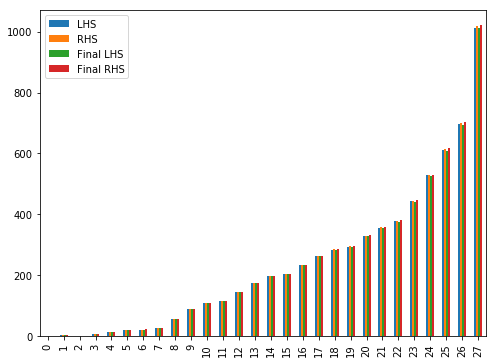

In [12]:
curve = eurusd_fwd_curve.filter(['LHS', 'RHS', 'Final LHS', 'Final RHS'], axis=1)
curve.plot(kind="bar", figsize=[8, 6])

## Swap Length

In [ ]:
eurusd_fwd_curve['Swap Length'] = eurusd_fwd_curve['Date2'] - eurusd_fwd_curve['Date1']